In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import requests, json
import matplotlib
from matplotlib import cm

In [94]:
class Sailboat():
    def __init__(self):
        self.data = None
        self.variable_to_column_name = {
                'o2 concentration': 'O2 Concentration [micromolar]',
                'o2 saturation': 'O2 Saturation [%]',
                'bb470': 'Bb(470) [NTU]',
                'bb532': 'Bb(532) [NTU]',
                'bb650': 'Bb(650) [NTU]',
                'cdom': 'CDOM [QSU]',
                'chla': 'Chl. a [ppb]',
                'phycocyanin': 'Phycocyanin [ppb]' 
            }
        self.color = None
    
    def api_download(self, date_interval, variables):
        """
        Download sailboat dataset with the given date interval and variables 
        """
        self.data = None 
        
    def str_to_float(self, variable):
        variable_column = self.variable_to_column_name[variable]
        self.data[variable_column].replace(',', np.nan, inplace=True)
        self.data[variable_column] = list(map(lambda x: float(x),
                                             self.data[variable_column]))
    
    def plot(self, x_variable, y_variable,
            xlim=None, ylim=None, x_fontsize=20, y_fontsize=20, p_size=5, 
             jet_convert=False):
        self.str_to_float(x_variable)
        self.str_to_float(y_variable)
        x_column = self.variable_to_column_name[x_variable]
        y_column = self.variable_to_column_name[y_variable]
        plt.figure(figsize=(10,10))
            
        if jet_convert:
            for bb in ['bb470', 'bb532', 'bb650']:
                self.str_to_float(bb)
                
            three_color_bb = np.array(self.data[['Bb(650) [NTU]', 'Bb(532) [NTU]', 'Bb(470) [NTU]']])
            row_sum = np.sum(three_color_bb, axis=1).reshape(len(three_color_bb),1)
            three_color_bb = three_color_bb/row_sum
            red = three_color_bb[:, 0]
            blue = three_color_bb[:, 2]
            scheme_percent = 0.5 + red*0.5 - blue*0.5
            self.color = [cm.jet(x) for x in scheme_percent]
            plt.scatter(self.data[x_column], self.data[y_column], s=p_size,
                        c=self.color, alpha=0.8)
        else:
            plt.scatter(self.data[x_column], self.data[y_column], s=p_size)
            
        plt.xlabel(x_column, fontsize=x_fontsize)
        plt.ylabel(y_column, fontsize=y_fontsize)
        if xlim != None:
            plt.xlim(xlim)
        if ylim != None:
            plt.ylim(ylim)
        plt.show()

In [11]:
import os 
all_df = []
for filename in os.listdir('Data'):
    if filename[0] != '.':
        df = pd.read_csv(f"Data/{filename}", sep=', ')
        all_df.append(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


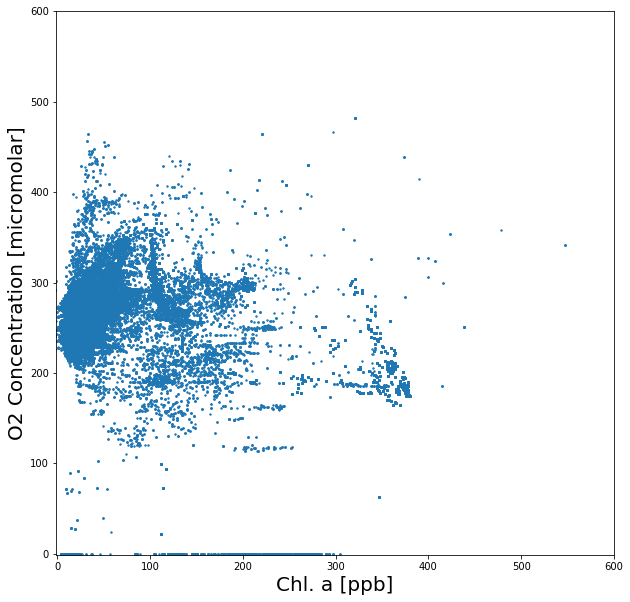

In [16]:
sailboat = Sailboat()
sailboat.data = pd.concat(all_df, ignore_index=True)
sailboat.plot(x_variable='chla', y_variable='o2 concentration',
             xlim=(-1,600), ylim=(-1,600), p_size=2)

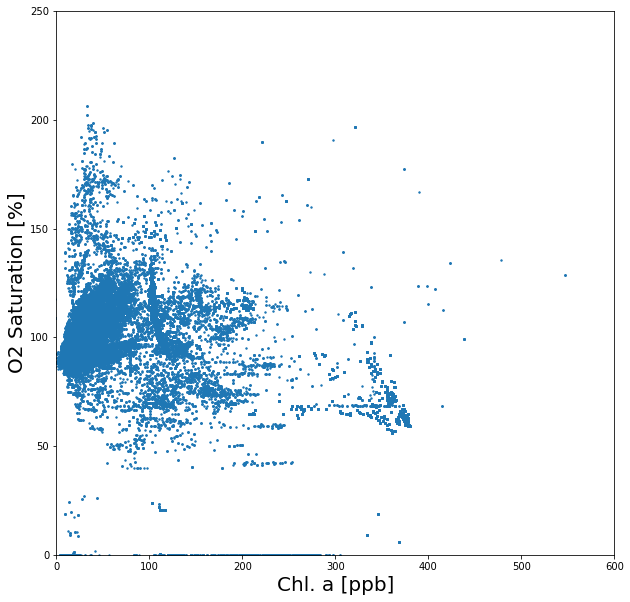

In [18]:
sailboat.plot(x_variable='chla', y_variable='o2 saturation',
             xlim=(0,600), ylim=(0,250), p_size=2)

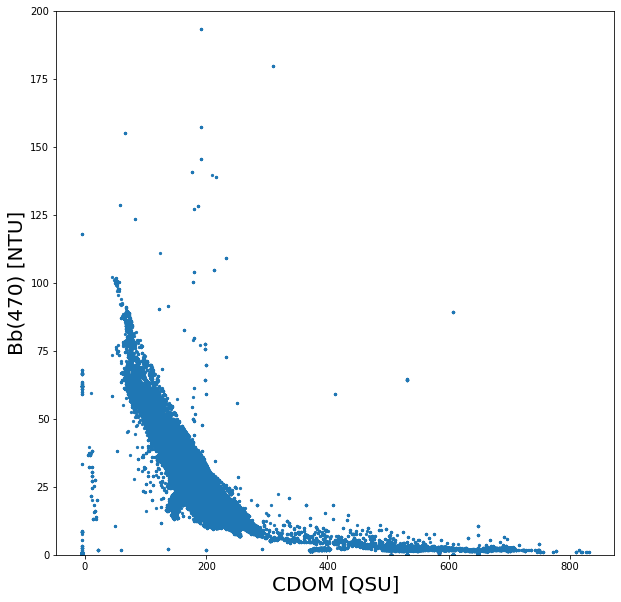

In [19]:
sailboat.plot(x_variable='cdom', y_variable='bb470',
             ylim=(0,200), p_size=5)

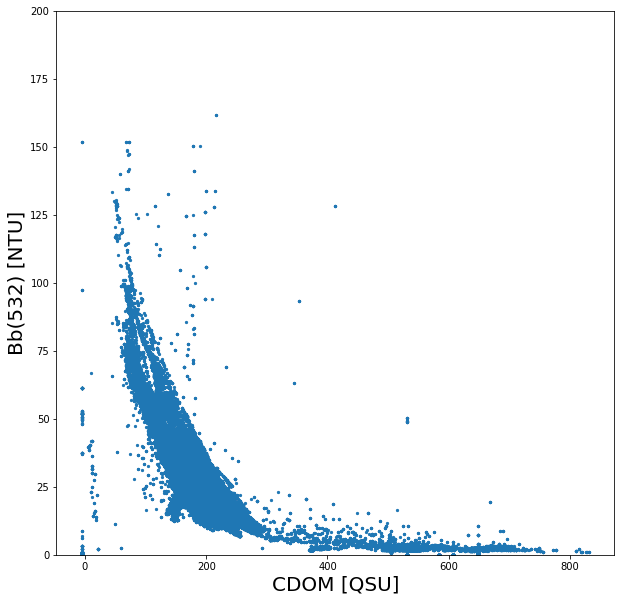

In [20]:
sailboat.plot(x_variable='cdom', y_variable='bb532',
             ylim=(0,200), p_size=5)

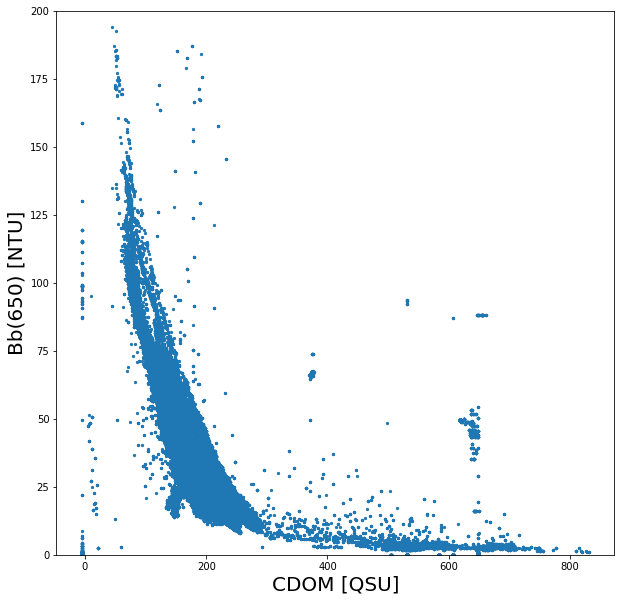

In [21]:
sailboat.plot(x_variable='cdom', y_variable='bb650',
             ylim=(0,200), p_size=5)

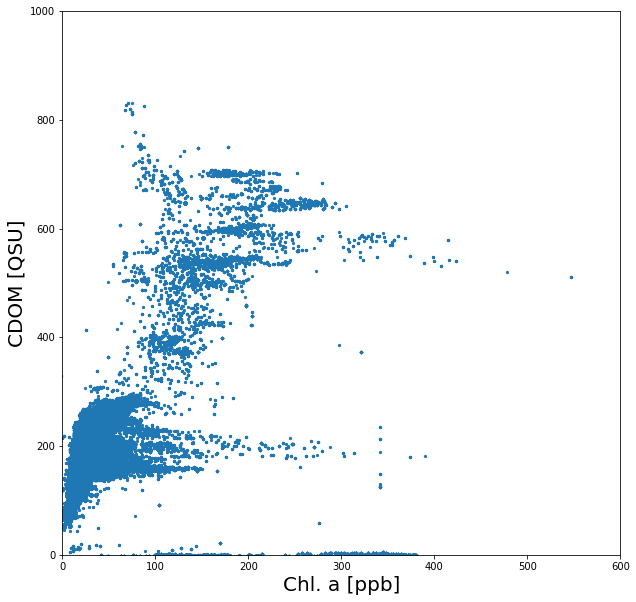

In [22]:
sailboat.plot(x_variable='chla', y_variable='cdom',
             xlim=(0,600), ylim=(0,1000), p_size=5)

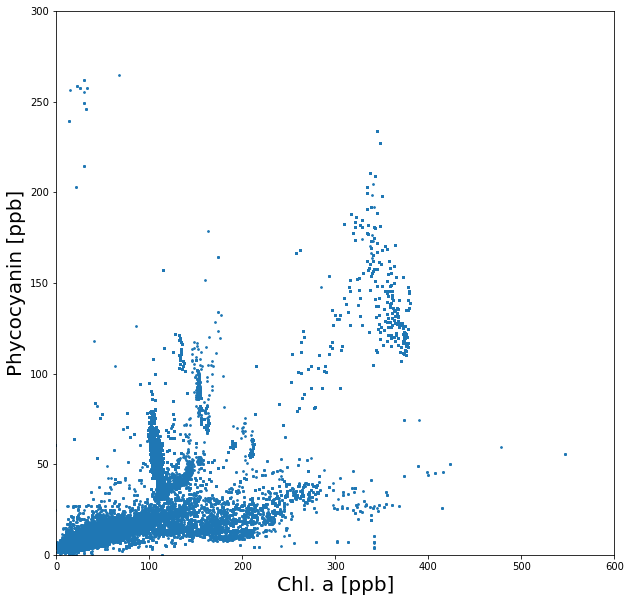

In [23]:
sailboat.plot(x_variable='chla', y_variable='phycocyanin',
             xlim=(0,600), ylim=(0,300), p_size=3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


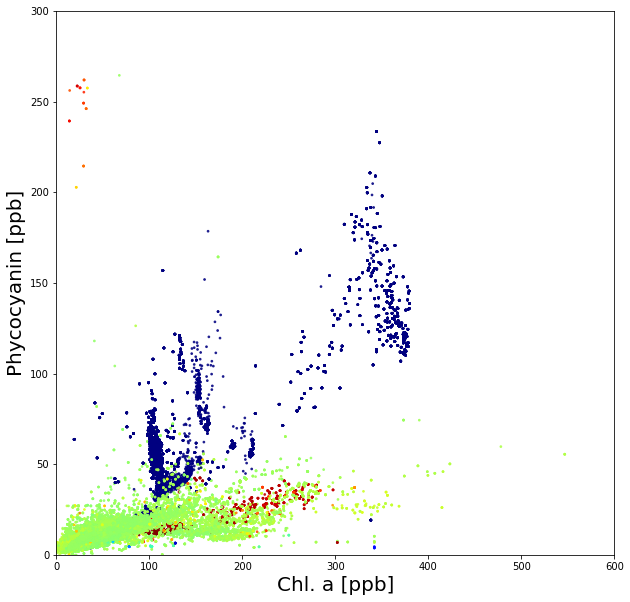

In [95]:
sailboat = Sailboat()
sailboat.data = pd.concat(all_df, ignore_index=True)
sailboat.plot(x_variable='chla', y_variable='phycocyanin',
             xlim=(0,600), ylim=(0,300),x_fontsize=20, y_fontsize=20, p_size=3, 
              jet_convert=True)